### Парралелизм

1. **Сравнение подходов для синхронизации потоков (1б)**

Напишите программу, которая моделирует доступ к общему ресурсу из пяти потоков. Каждый поток должен:

1. Заблокировать доступ к ресурсу.
2. Печатать сообщение о начале работы.
3. "Использовать" ресурс (симулируйте это с помощью `time.sleep(1)`).
4. Печатать сообщение об окончании работы и освобождать ресурс.

Сравните два подхода к синхронизации:

1. Используя `threading.Lock`.
2. Используя `threading.Semaphore`, где одновременно доступ к ресурсу могут иметь два потока.

**Пример использования:**
```python
import threading
import time

def access_resource_with_lock(lock):
    # Реализуйте доступ к ресурсу с использованием lock

def access_resource_with_semaphore(semaphore):
    # Реализуйте доступ к ресурсу с использованием semaphore

# Запустите пять потоков с lock и пять потоков с semaphore
```

**Один из возможных выводов (недетерминированный результат):**
```
С lock:
Поток 0 начал работу.
Поток 0 завершил работу.
Поток 1 начал работу.
Поток 1 завершил работу.
Поток 2 начал работу.
Поток 2 завершил работу.
Поток 3 начал работу.
Поток 3 завершил работу.
Поток 4 начал работу.
Поток 4 завершил работу.

С semaphore:
Поток 0 начал работу.
Поток 1 начал работу.
Поток 0 завершил работу.
Поток 2 начал работу.
Поток 1 завершил работу.
Поток 3 начал работу.
Поток 2 завершил работу.
Поток 4 начал работу.
Поток 3 завершил работу.
Поток 4 завершил работу.
```


2. **Очередь задач с задержкой на потоках (2б)**

Реализуйте систему обработки задач с очередью `queue.PriorityQueue`. Программа должна состоять из:

1. **Производителя** (`producer`): добавляет задачи с приоритетами от 1 до 5 (1 — самый высокий) в очередь с интервалом 0.5 секунды.
2. **Потребителя** (`consumer`): извлекает задачи из очереди в порядке приоритета и обрабатывает их (задержка 1 секунда на задачу).

Если потребитель не получает новую задачу за 2 секунды, он завершает выполнение.

**Пример использования:**
```python
from queue import PriorityQueue
import threading
import time

def producer(queue):
    for i in range(5, 0, -1): # Добавление задачи с такими приоритетами в очередь в такой последовательности
        # Ваш код

def consumer(queue):
    # Извлекайте задачи в порядке приоритета и обрабатывайте их

# Создайте потоки для producer и consumer
```

**Пример возможного вывода (недетерминированный результат)**
```
Добавлена задача с приоритетом 5
Обработка Задача с приоритетом 5
Добавлена задача с приоритетом 4
Обработка Задача с приоритетом 4Добавлена задача с приоритетом 3

Добавлена задача с приоритетом 2
Обработка Задача с приоритетом 2Добавлена задача с приоритетом 1

Обработка Задача с приоритетом 1
Обработка Задача с приоритетом 3
Очередь пуста, завершение.
```


3. **Ускорение обработки данных с помощью `ProcessPoolExecutor` / `multiprocessing.Pool` / `modin`  (2б)**

Напишите программу, которая читает большой CSV-файл с колонками `col1` и `col2`. Используйте `ProcessPoolExecutor` для выполнения следующих операций:

1. Для каждой строки вычислить результат: $ \text{result} = \text{col1}^2 + 2 \cdot \text{col2} $.
2. Записать результаты обратно в новый CSV-файл.

Добавьте измерение времени выполнения.

**Пример использования::**
```python
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
from multiprocessing import Pool


def process_row(row):
    # Реализуйте вычисление для одной строки

df = pd.DataFrame({
    'col1': range(1, 1000001),
    'col2': range(1000000, 0, -1)
})

# Реализуйте чтение, обработку и запись данных с использованием ProcessPoolExecutor / multiprocessing.Pool. Удалось ли добиться ускорения с помощью распараллеливания?
# Попробуйте использовать разные размеры чанков – 25000, 200000, 500000,

# А теперь попробуйте использовать библиотеку `modin`. Сравните результаты
```




In [2]:
import threading
import time

def access_resource_with_lock(lock, thread_id):
    with lock:
        print(f"[LOCK] Поток {thread_id} начал работу")
        time.sleep(1)
        print(f"[LOCK] Поток {thread_id} завершил работу")

lock = threading.Lock()

threads = []
for i in range(5):
    t = threading.Thread(target=access_resource_with_lock, args=(lock, i))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

[LOCK] Поток 0 начал работу
[LOCK] Поток 0 завершил работу
[LOCK] Поток 1 начал работу
[LOCK] Поток 1 завершил работу
[LOCK] Поток 2 начал работу
[LOCK] Поток 2 завершил работу
[LOCK] Поток 3 начал работу
[LOCK] Поток 3 завершил работу
[LOCK] Поток 4 начал работу
[LOCK] Поток 4 завершил работу


In [5]:
def access_resource_with_semaphore(semaphore, thread_id):
    with semaphore:
        print(f"[Semaphore] Поток {thread_id} начал работу")
        time.sleep(2)
        print(f"[Semaphore] Поток {thread_id} завершил работу")

semaphore = threading.Semaphore(2)

threads = []
for i in range(5):
    t = threading.Thread(target=access_resource_with_semaphore, args=(semaphore, i))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

[Semaphore] Поток 0 начал работу
[Semaphore] Поток 1 начал работу
[Semaphore] Поток 0 завершил работу
[Semaphore] Поток 2 начал работу
[Semaphore] Поток 1 завершил работу
[Semaphore] Поток 3 начал работу
[Semaphore] Поток 2 завершил работу
[Semaphore] Поток 4 начал работу
[Semaphore] Поток 3 завершил работу
[Semaphore] Поток 4 завершил работу


In [6]:
from queue import PriorityQueue
import threading
import time

task_queue = PriorityQueue()

def producer(queue):
    for i in range(5, 0, -1):
        task = (i, f"Задача {i}")
        queue.put(task)
        print(f"[Producer] Добавлена {task[1]} с приоритетом {task[0]}")
        time.sleep(0.5)

def consumer(queue):
    while True:
        try:
            task = queue.get(timeout=2)
            print(f"[Consumer] Обрабатывается {task[1]} с приоритетом {task[0]}")
            time.sleep(1)
        except:
            print("[Consumer] Задач нет, завершение работы.")
            break

producer_thread = threading.Thread(target=producer, args=(task_queue,))
consumer_thread = threading.Thread(target=consumer, args=(task_queue,))

producer_thread.start()
consumer_thread.start()

producer_thread.join()
consumer_thread.join()

[Producer] Добавлена Задача 5 с приоритетом 5
[Consumer] Обрабатывается Задача 5 с приоритетом 5
[Producer] Добавлена Задача 4 с приоритетом 4
[Producer] Добавлена Задача 3 с приоритетом 3
[Consumer] Обрабатывается Задача 3 с приоритетом 3
[Producer] Добавлена Задача 2 с приоритетом 2
[Producer] Добавлена Задача 1 с приоритетом 1
[Consumer] Обрабатывается Задача 1 с приоритетом 1
[Consumer] Обрабатывается Задача 2 с приоритетом 2
[Consumer] Обрабатывается Задача 4 с приоритетом 4
[Consumer] Задач нет, завершение работы.


## Графики

https://matplotlib.org/stable/gallery/ - разнообразные примеры

In [7]:
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

from IPython.display import Image
from matplotlib import pyplot as plt

In [3]:
import os
IMG_FOLDER = 'img'

os.makedirs(IMG_FOLDER, exist_ok=True)

# Simple function

- Сгенерируйте данные для функции $y = x^3$. Возьмите числа от 0 до 99.
- Отобразите данные на графике. Обозначьте кажду точку в виде красного "+"
- Подпишите оси
- Дайте название графику

## Simple Matplotlib plot

In [8]:
n_points = 100

data = np.arange(n_points) ** 3

*Пример*

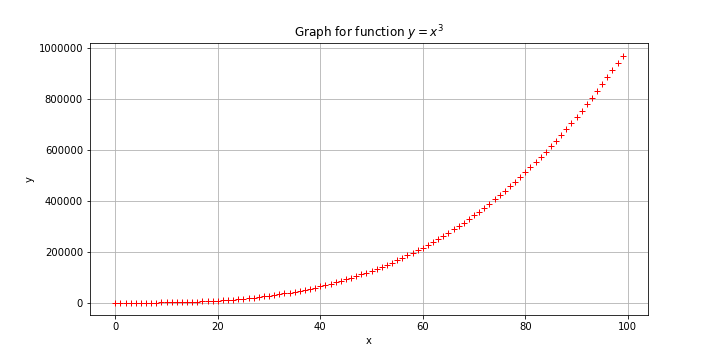

In [6]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1.png'))

*Решение*

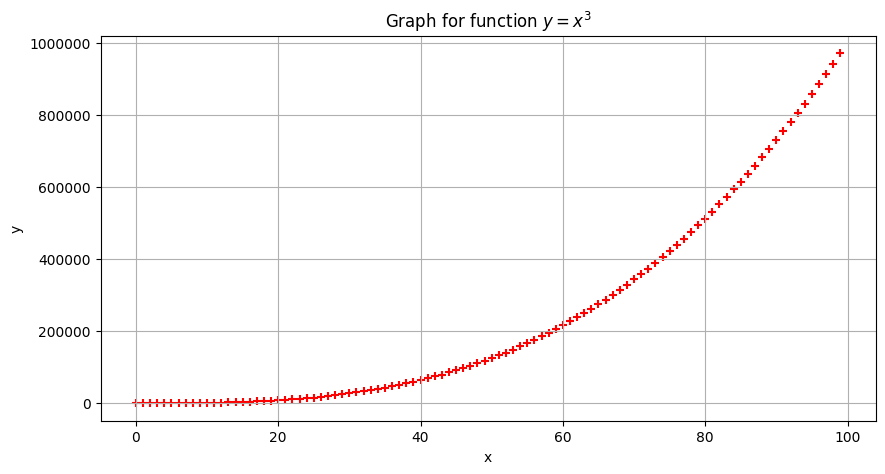

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(n_points), data, marker='+', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(scilimits=(1, 7))
plt.grid()
plt.show()

или

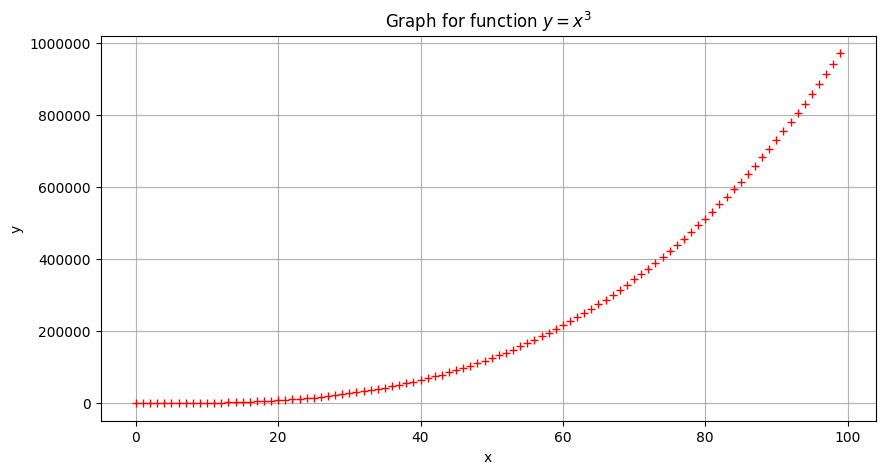

In [17]:
plt.figure(figsize=(10, 5))

plt.plot(data, 'r+')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(style='plain')

plt.savefig(os.path.join(IMG_FOLDER, 'task0_1.png'))
plt.show()

Сглаживание линии графика

In [19]:
import numpy as np
import plotly.express as px

n_points = 10
data = np.arange(n_points) ** 3

fig = px.line(
    x=range(n_points),
    y=data,
    line_shape='spline',
    title="Smooth (Spline) Line"
)

fig.show()

## Plot two lines

Представьте что вы сделали модель и предсказали еще 10 точек для вашего графика выше. Вы имеете точные значения и оценки на их вероятные верхние и нижние границы.

Постройте график, где сначала красным цветом будут показываться ваши "тренировочные" данные, а дальше желтым -- "предсказания". Светло-желтым закрасьте области между верхней и нижней границей для каждой точки, подпишите ее как CI в графике

In [16]:
preds_size = 10

preds = np.arange(len(data), len(data) + preds_size) ** 3

all_data = np.concatenate((data, preds))
stds = np.array([np.std(all_data[i - 50: i]) for i in range(len(data), len(data) + preds_size)])

l_bounds = preds - stds
h_bounds = preds + stds

*Пример*

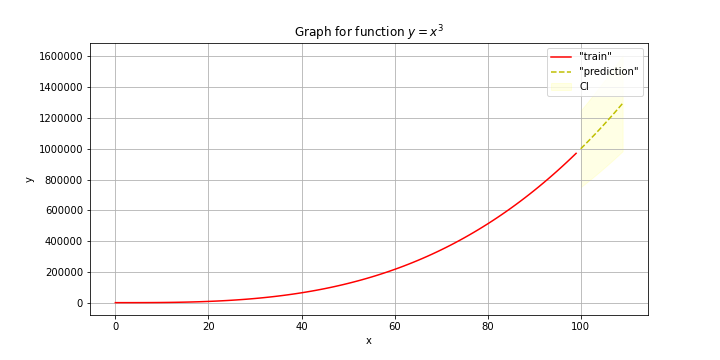

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2.png'))

*Решение*

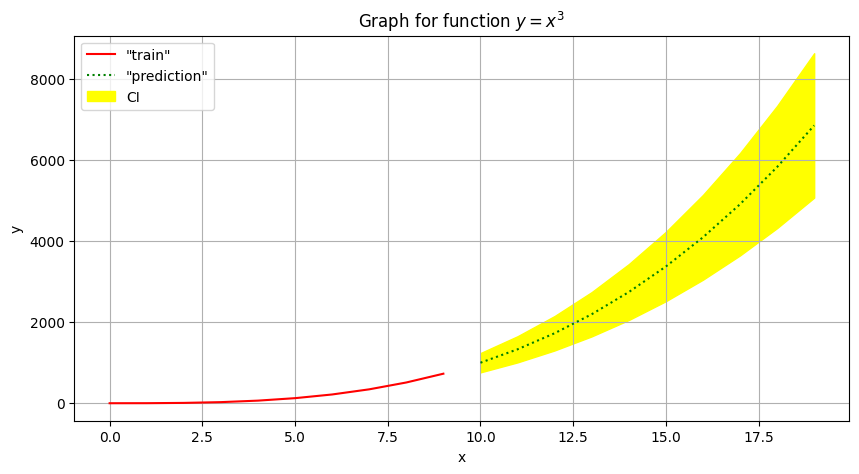

In [17]:
train_range = np.arange(len(data))
preds_range = np.arange(len(data), len(data) + preds_size)

plt.figure(figsize=(10, 5))

plt.plot(train_range, data, color='red', label='"train"')
plt.plot(preds_range, preds, ':g', label='"prediction"') # --y

plt.fill_between(preds_range, l_bounds, h_bounds, alpha=1, color='yellow', label='CI')

plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph for function $y = x^3$')
plt.ticklabel_format(style='plain')

# plt.savefig(os.path.join(IMG_FOLDER, 'task0_2.png'))
plt.show()

## Using Plotly

**Давайте теперь сделаем интерактивный график в plotly**

https://plotly.com/python/marker-style/#using-a-custom-marker

*Пример*

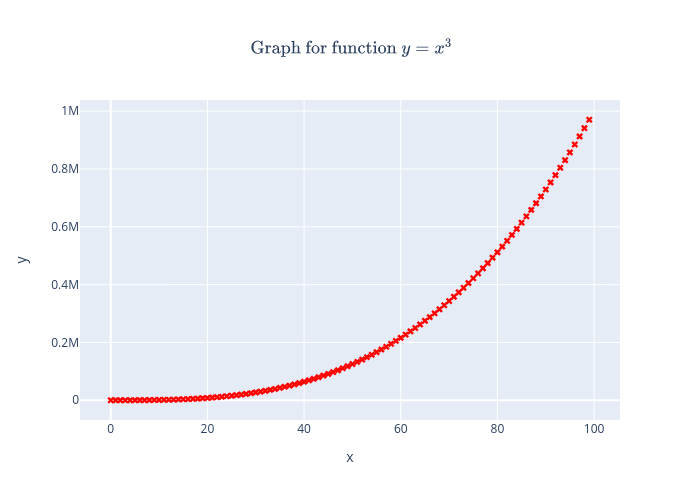

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_1_plotly.png'))

*Решение*

In [24]:
plotly_fig = go.Figure(
    data=go.Scatter(
        x=np.arange(len(data)), y=data, name='"train"'
    ),
)

plotly_fig.update_traces(
    marker={
        'color': 'red',
        'symbol':'x'
    },
    mode='markers'
)

plotly_fig.update_layout(
    title=r'$\text{Graph for function } y = x^3$',
    title_x=0.5,
    xaxis_title="x",
    yaxis_title="y",
)

plotly_fig.show()

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_1_plotly.png'))

**Добавим "предикты" с интервалами по аналогии с matplotlib**

*Пример*

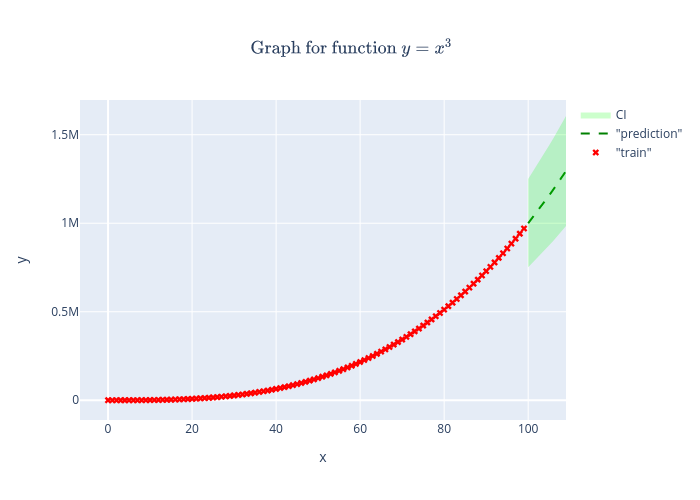

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task0_2_plotly.png'))

*Решение*

In [25]:
plotly_fig.add_trace(
    go.Scatter(
        x=preds_range,
        y=preds,
        name='"prediction"',
        mode='lines',
        line=dict(color='green', width=2, dash='dash')
    )
)


# add filled area

plotly_fig.add_trace(
    go.Scatter(
        x=preds_range,
        y=l_bounds,
        mode='lines',
        line_color='rgba(0,0,0,0)',
        showlegend=False,
    )
)

plotly_fig.add_trace(
    go.Scatter(
        x=preds_range,
        y=h_bounds,
        fill='tonexty',
        mode='lines',
        line_color='rgba(0,0,0,0)',
        fillcolor='rgba(0, 255, 0, 0.2)',
        name='CI'
    )
)

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task0_2_plotly.png'))

# Figure for artificial data. Subplots. Line plot. Scatter plot

In [20]:
np.random.seed(42)

df = pd.DataFrame(data={'column_a':np.random.randint(0, 100, 30),
                        'column_b':np.random.randint(0, 100, 30),
                        'column_c':np.random.randint(0, 100, 30)})
df.head()

,column_a,column_b,column_c
0,51,90,91
1,92,58,59
2,14,41,70
3,71,91,43
4,60,59,7


Постройте два графика в одной большой фигуре.
Назовите фигуру "Task 1", используйте шрифт размера 20.

- Пошарьте ось x между графиками. Назовите ее "index".

- На первом графике:
    - нарисуйте две линии по данным "column_a", и "column_b";
    - сделайте "легенду" в верхней части графика, обозначьте оранжевым цветом данные из колонки a, синим -- данные из колонки b;
    - дайте название оси y: value;
    - назовите график "Line plots for column_a, column_b"

- На втором графике:
    - покажите зелеными точками данные из третьей колонки;
    - сделайте легенду в правом нижнем углу
    - назовите график "Scatter plot for column_c";

- Сохраните получившийся график в формат .png с названием 'task1_1.png'


https://matplotlib.org/stable/tutorials/colors/colors.html

*Пример 1*

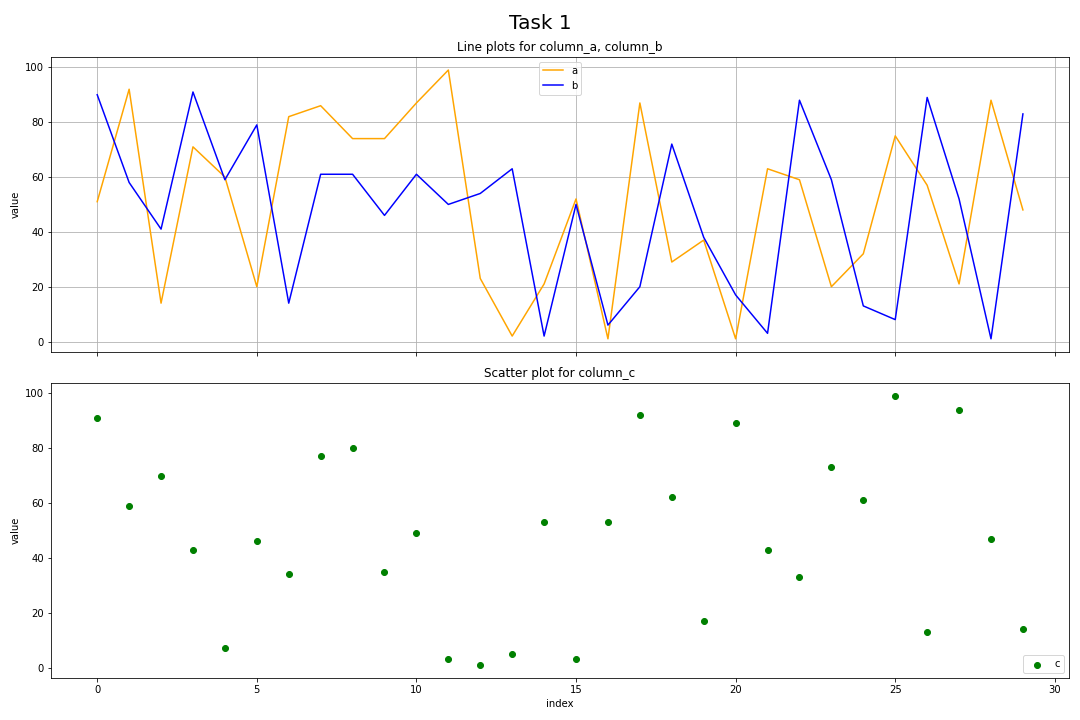

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task1.png'))

*Решение*

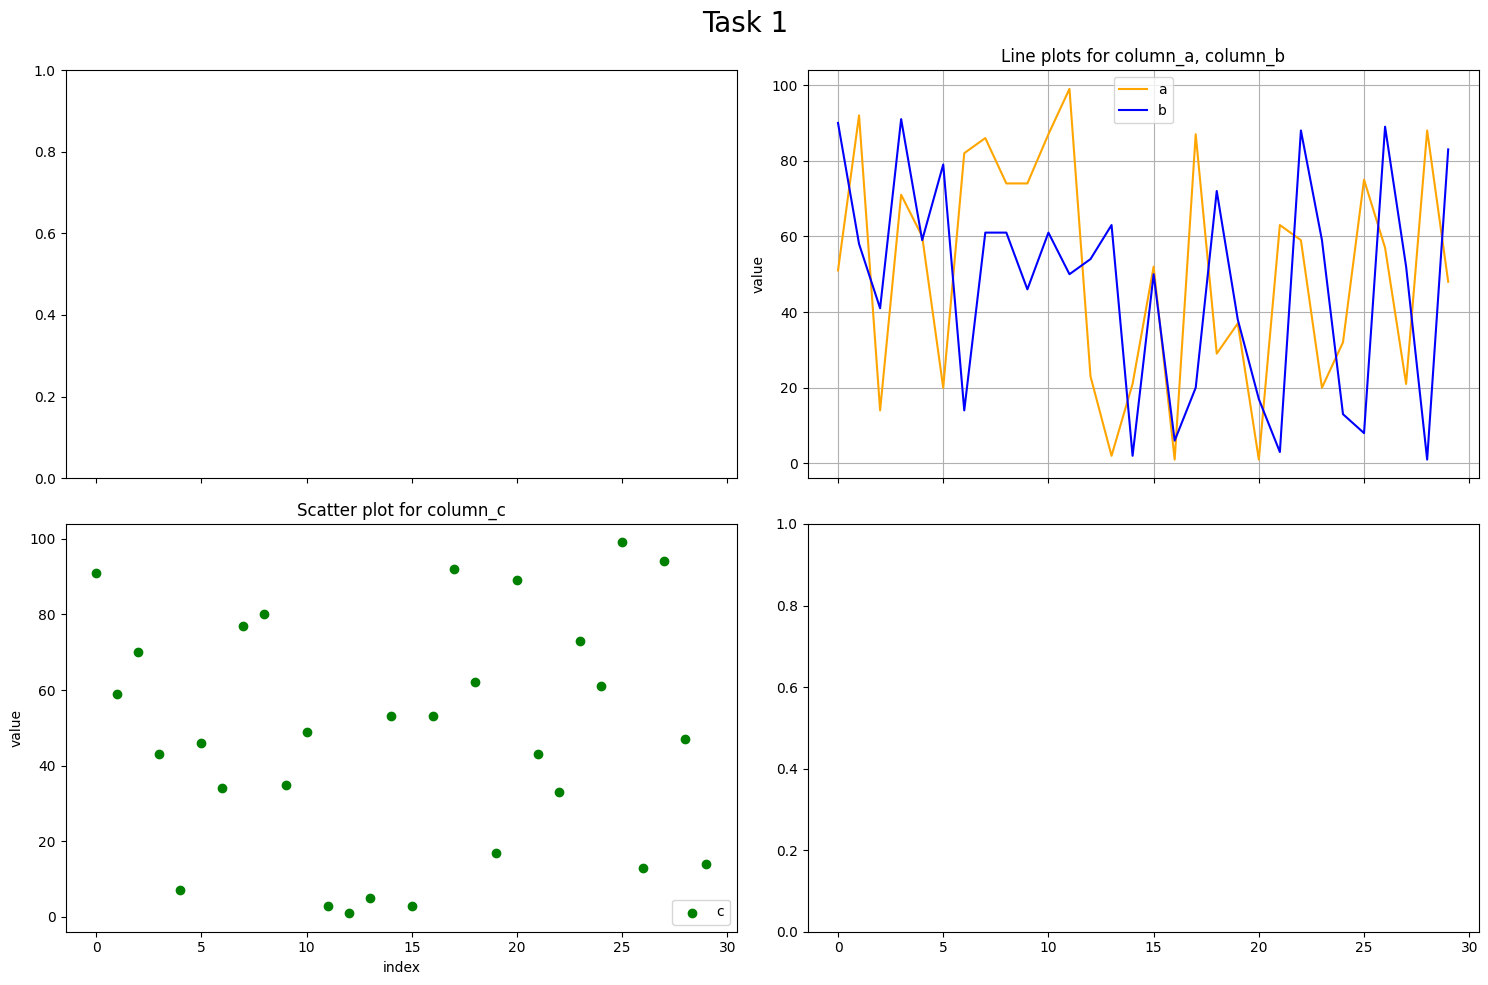

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

ax[0, 1].plot(df['column_a'], label='a', color='orange')
ax[0, 1].plot(df['column_b'], label='b', color=(0, 0, 1))
ax[0, 1].grid()
ax[0, 1].legend(loc=9)
ax[0, 1].set_title('Line plots for column_a, column_b')
ax[0, 1].set_ylabel('value')


ax[1, 0].scatter(df.index, df['column_c'], label='c', color='g')
ax[1, 0].set_title('Scatter plot for column_c')
ax[1, 0].legend(loc=4)
ax[1, 0].set_xlabel('index')
ax[1, 0].set_ylabel('value')


fig.suptitle('Task 1', fontsize=20)
fig.tight_layout()
fig.show()


In [ ]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task1.png'))

    Для цветов я люблю использовать такую штуку. Заранее назначить набор цветов в глобальную переменную, и "ходить" по ним в графиках. Вот так:
    
```Python
from itertools import cycle

COLORS = cycle(['b','g','r','c','m','y'])  # have different colors in complex plots across the notebook
...
ax.plot(..., color=next(COLORS))
...

```

## Bar plot

Для датафрейма выше постройте bar plots отдельно для данных из колонок a, b, c. Подпишите значения в каждом "столбике" (`ax.bar_label` может помочь)

PS для однотипных операций используйте циклы

In [26]:
from itertools import cycle
COLORS = cycle(['b','g','r','c','m','y'])

### Using Matplotlib

*Пример*

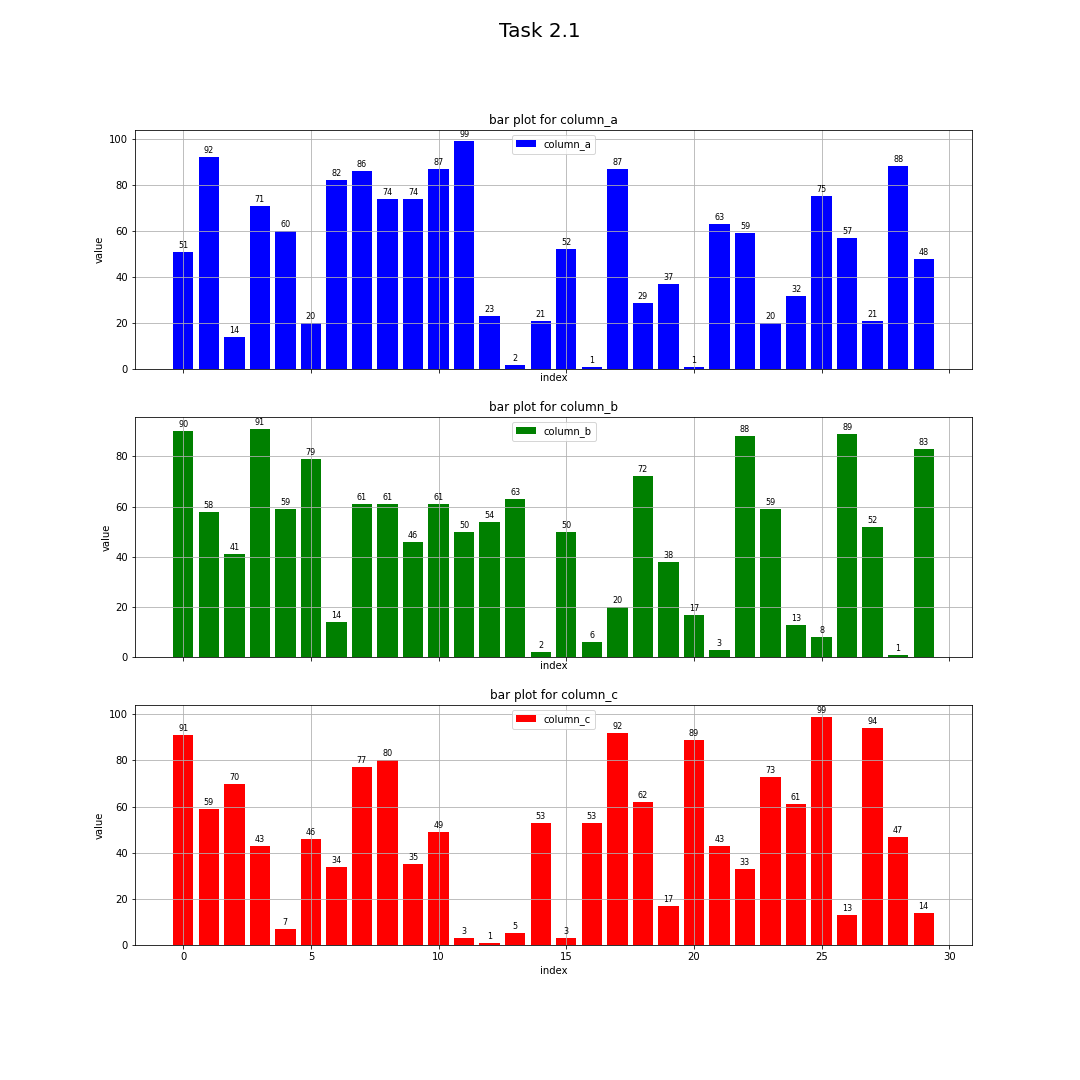

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1.png'))

*Решение*

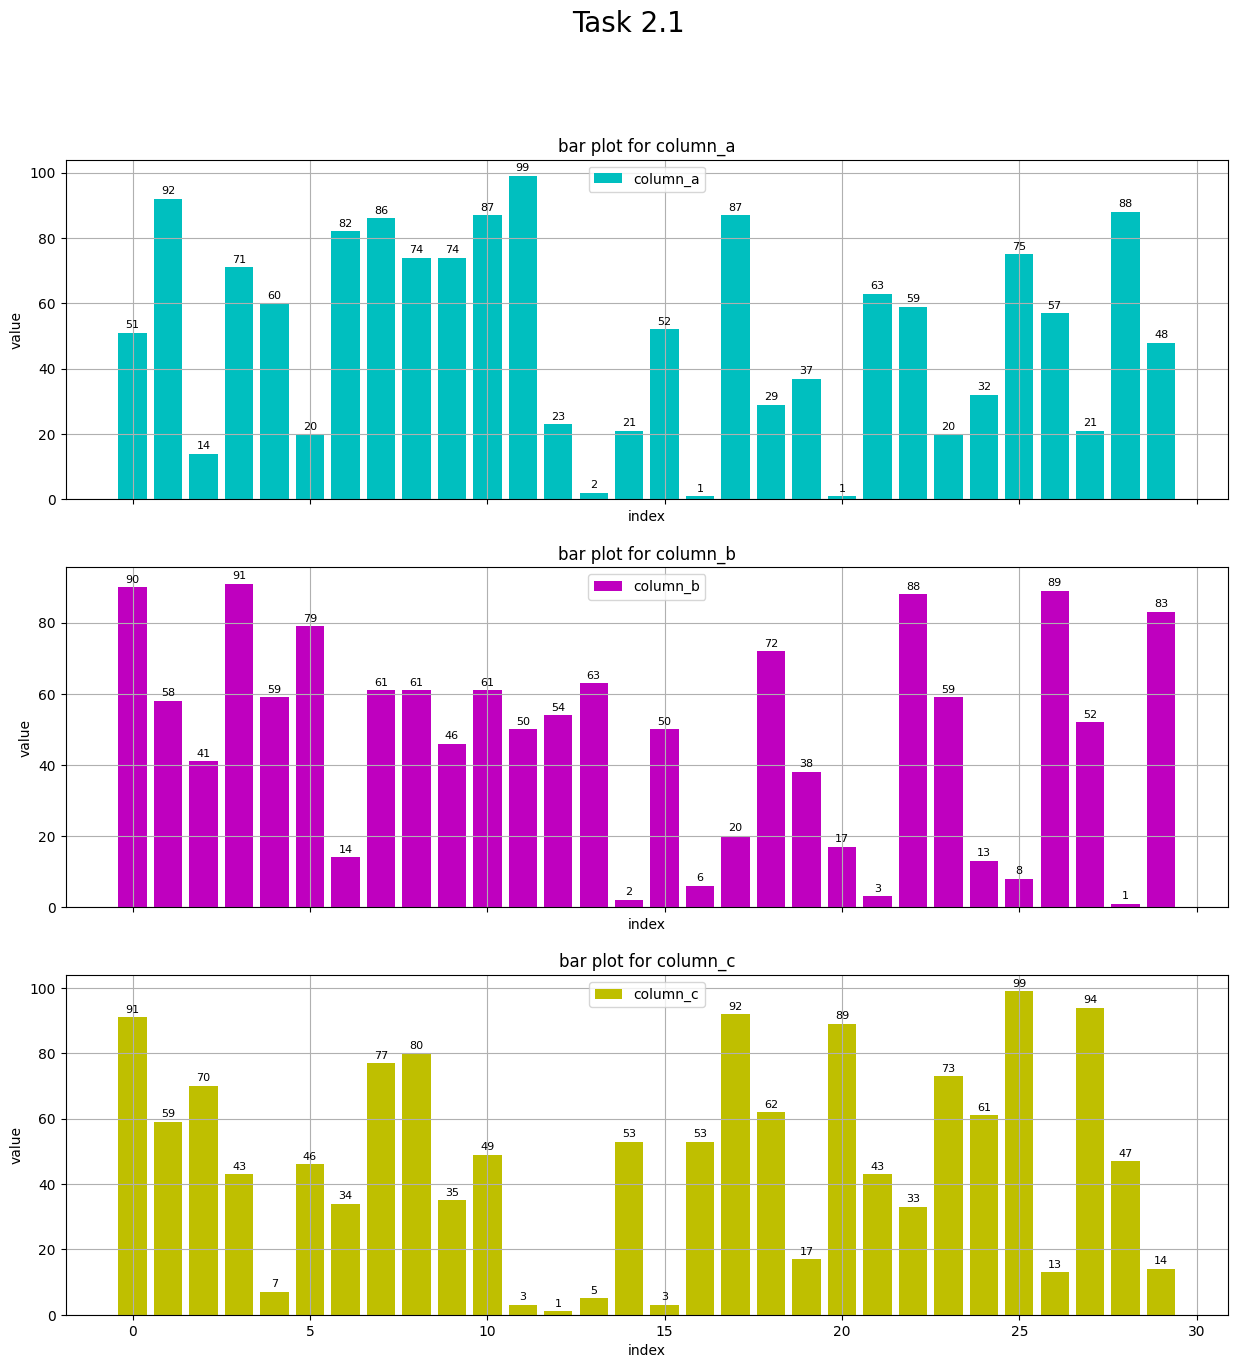

In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.arange(1, 31)
column_a = np.random.randint(1, 100, size=30)
column_b = np.random.randint(1, 100, size=30)
column_c = np.random.randint(1, 100, size=30)

columns = [column_a, column_b, column_c]

fig, ax = plt.subplots(df.shape[1], 1, figsize=(15, 15), sharex=True)

for i, column_name in enumerate(df.columns):
    axis = ax[i]
    axis.bar(df.index, df[column_name], label=column_name, color=next(COLORS))
    axis.legend(loc=9)
    axis.set_title(f'bar plot for {column_name}')
    axis.bar_label(axis.containers[0], label_type='edge', padding=2, fontsize=8)
    axis.set_ylabel('value')
    axis.set_xlabel('index')
    axis.grid()

fig.suptitle('Task 2.1', fontsize=20)
fig.show()


In [ ]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_1.png'))

**Также можно использовать df.plot от pandas**

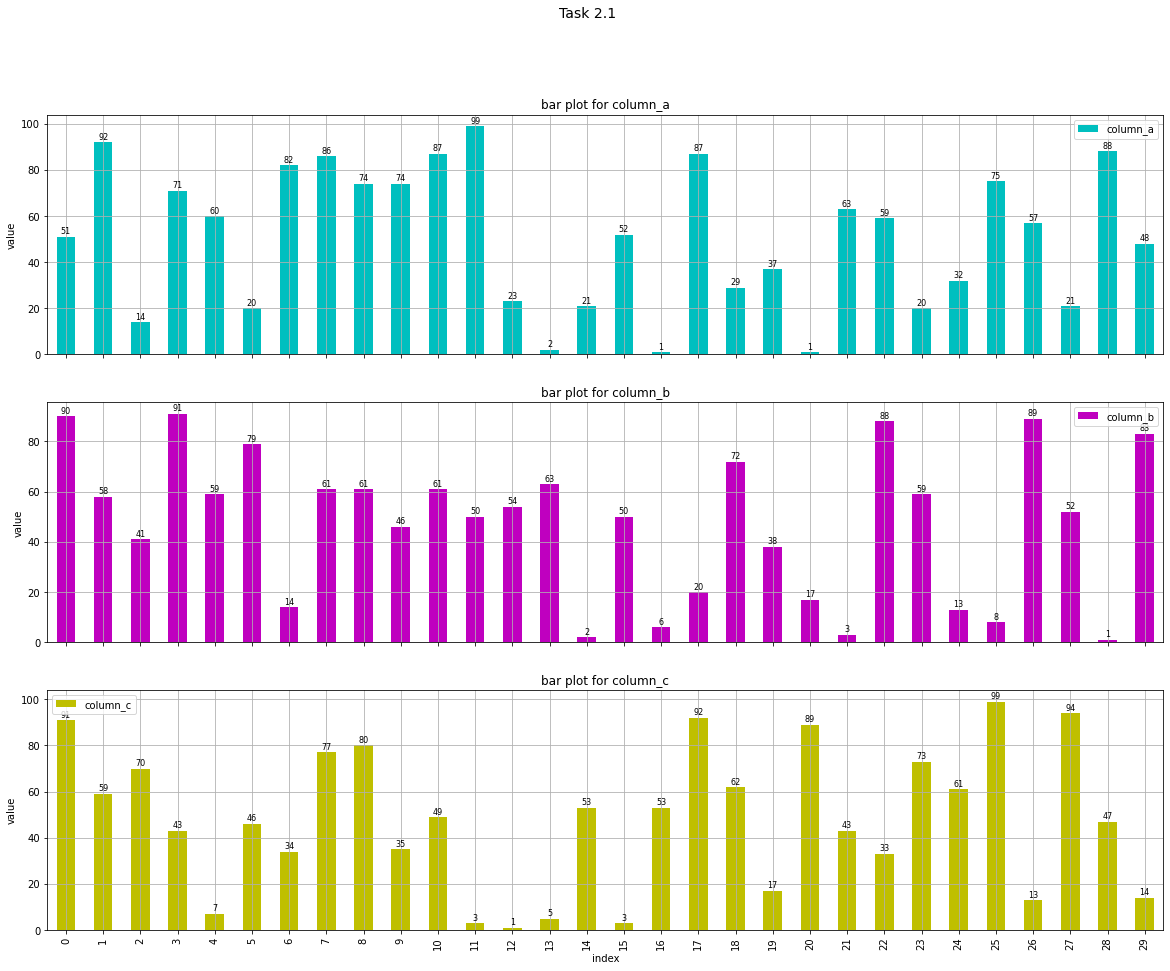

In [ ]:
fig, ax = plt.subplots(df.shape[1], 1, figsize=(20, 15), sharex=True)

for i, column_name in zip(range(3), df.columns):
    df[column_name].plot(kind='bar',
                         title=f'bar plot for {column_name}',
                         xlabel='index',
                         ylabel='value',
                         legend=True,
                         grid=True,
                         ax=ax[i],
                         color=next(COLORS))
    ax[i].bar_label(ax[i].containers[0], label_type='edge', padding=1, fontsize=8)

fig.suptitle('Task 2.1', fontsize=14)
fig.show()

### Using Plotly

*Пример*

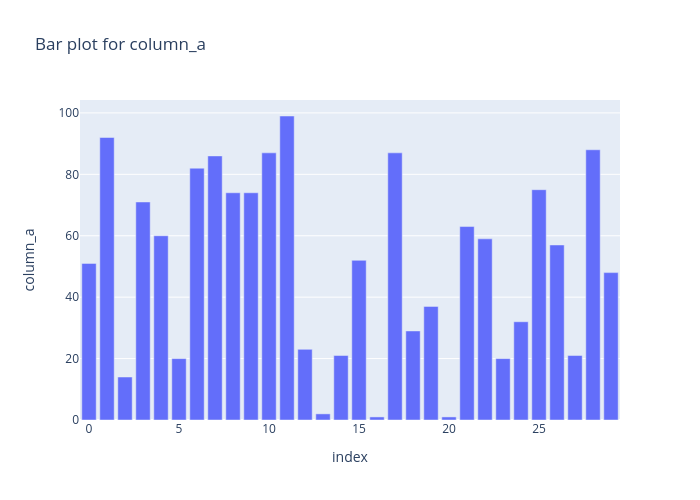

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_1.png'))

*Решение*

In [29]:
plotly_fig = px.bar(df, x=df.index, y='column_a', barmode='group', title='Bar plot for column_a')
plotly_fig.show()

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_1.png'))

**Попробуем отобразить все колонки сразу**

*Пример*

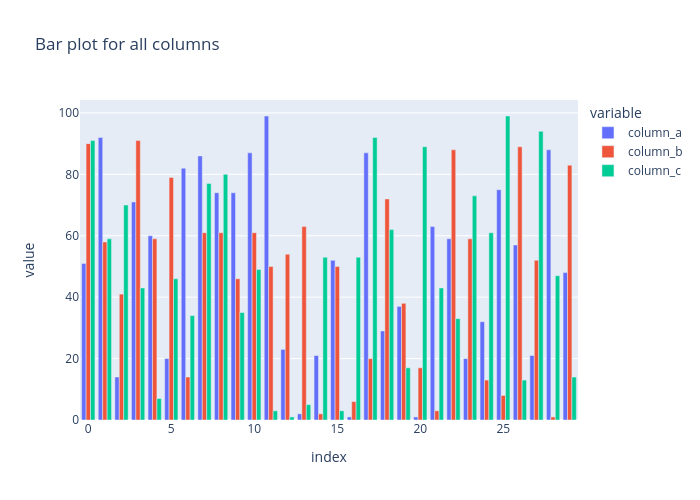

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_1_plotly_2.png'))

*Решение*

In [ ]:
plotly_fig = px.bar(df, x=df.index, y=df.columns, barmode='group', title='Bar plot for all columns')
plotly_fig.show()

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_1_plotly_2.png'))

## Stacked Bar Plot

### Using Matplotlib

**Выделение разных частей в колонках**

Сделайте bar plot по всем колонкам (суммы) и цветами укажите "вклад" каждой колонки

*Пример*

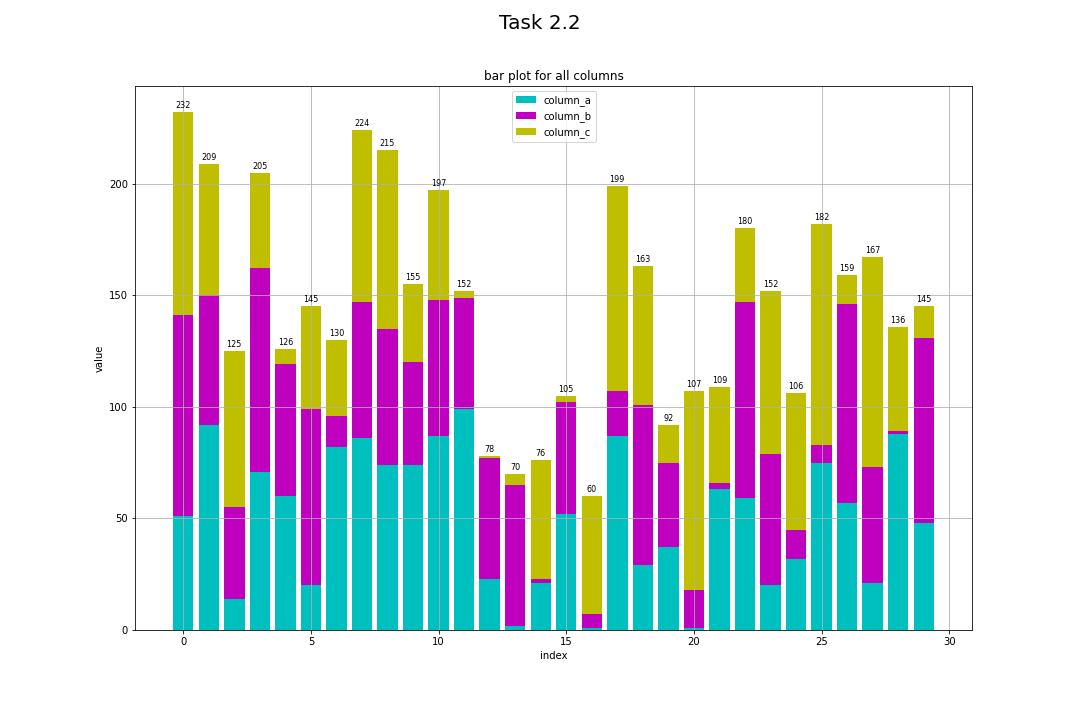

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2.png'))

*Решение*

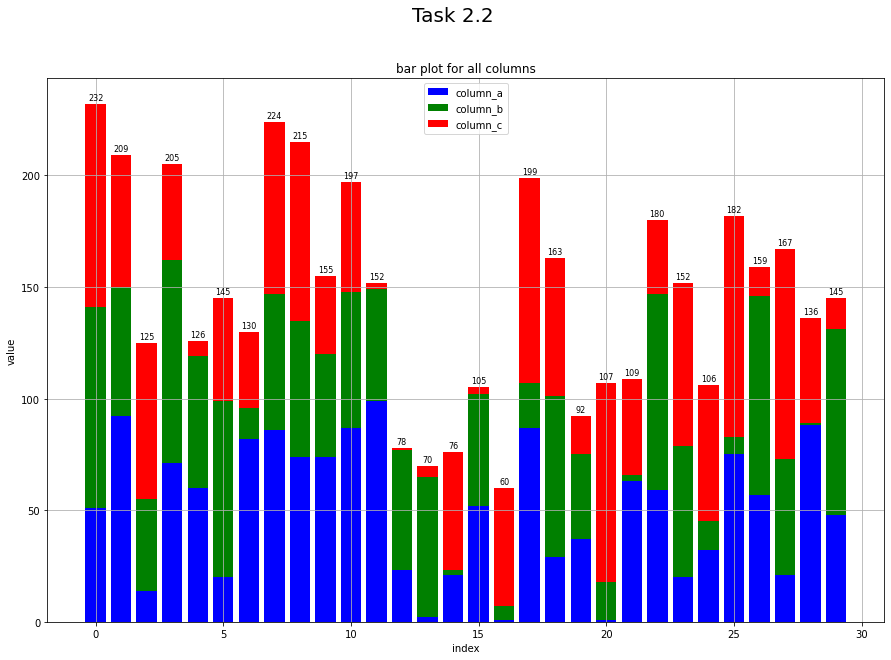

In [ ]:
fig, axis = plt.subplots(1, 1, figsize=(15, 10), sharex=True)

cum = None
for column_name in df.columns:
    axis.bar(df.index, df[column_name], label=column_name, color=next(COLORS), bottom=cum)
    if cum is None:
        cum = df[column_name].copy()
    else:
        cum += df[column_name].copy()

axis.legend(loc=9)
axis.set_title(f'bar plot for all columns')
axis.bar_label(axis.containers[-1], label_type='edge', padding=2, fontsize=8)

axis.set_ylabel('value')
axis.set_xlabel('index')
axis.grid()

fig.suptitle('Task 2.2', fontsize=20)
fig.show()

Убедимся, что наши значение похожи на правду

In [ ]:
df.sum(1).values

array([232, 209, 125, 205, 126, 145, 130, 224, 215, 155, 197, 152,  78,
        70,  76, 105,  60, 199, 163,  92, 107, 109, 180, 152, 106, 182,
       159, 167, 136, 145])

In [ ]:
# fig.savefig(os.path.join(IMG_FOLDER, 'task2_2.png'))

### Using Plotly

#### Convert Matplotlib graph to Plotly

Давайте попробуем написать небольшой "маппер" из графика выше с использованием matplotlib в plotly!

In [ ]:
axis

<AxesSubplot:title={'center':'bar plot for all columns'}, xlabel='index', ylabel='value'>

In [ ]:
# dir(axis)

In [ ]:
axis.get_children()

 Text(0, 2, '232'),
 Text(0, 2, '209'),
 Text(0, 2, '125'),
 Text(0, 2, '205'),
 Text(0, 2, '126'),
 Text(0, 2, '145'),
 Text(0, 2, '130'),
 Text(0, 2, '224'),
 Text(0, 2, '215'),
 Text(0, 2, '155'),
 Text(0, 2, '197'),
 Text(0, 2, '152'),
 Text(0, 2, '78'),
 Text(0, 2, '70'),
 Text(0, 2, '76'),
 Text(0, 2, '105'),
 Text(0, 2, '60'),
 Text(0, 2, '199'),
 Text(0, 2, '163'),
 Text(0, 2, '92'),
 Text(0, 2, '107'),
 Text(0, 2, '109'),
 Text(0, 2, '180'),
 Text(0, 2, '152'),
 Text(0, 2, '106'),
 Text(0, 2, '182'),
 Text(0, 2, '159'),
 Text(0, 2, '167'),
 Text(0, 2, '136'),
 Text(0, 2, '145'),
 Text(0.5, 1.0, 'bar plot for all columns'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html

Основной интересный для нас объект в bar plot -- это прямоугольник. Надо понять, какие параметры могут его задавать в plotly. Скорее всего это координаты: x, y, ширина

Попробуем сначала сконвертить один такой rectangle object в plotly

In [ ]:
rectangle = axis.get_children()[0]

In [ ]:
x = rectangle.get_x()

In [ ]:
width = rectangle.get_width()

In [ ]:
h = rectangle.get_height()

In [ ]:
plotly_figure = go.Figure(
    go.Bar(x=[x], y=[h], width=[width]),
    layout=go.Layout(barmode="group")
)

In [ ]:
plotly_figure.show()

Вроде похоже на правду. Теперь надо проапдейтить фигуру другими столбиками. Нас интересуют только объекты типа Rectange

In [ ]:
plotly_figure.data

(Bar({
     'width': [0.8], 'x': [-0.4], 'y': [51]
 }),)

In [ ]:
plotly_figure.data[0]['width']

(0.8,)

Нашли наш Bar Plot в объекте фигуры. Теперь нужно добавить новые данные в списки с координатами по оси абсцисс, высотами и широтами

In [ ]:
xs = []
widths = []
heights = []

for rect in axis.get_children():
    if isinstance(rect, matplotlib.patches.Rectangle):
        xs.append(rect.get_x())
        widths.append(rect.get_width())
        heights.append(rect.get_height())

In [ ]:
plotly_figure.data[0]['width'] = widths
plotly_figure.data[0]['x'] = xs
plotly_figure.data[0]['y'] = heights

In [ ]:
plotly_figure.show()

Хорошо. Но пока не хватает цвета и легенды

In [ ]:
rectangle.get_facecolor()

(0.0, 0.0, 1.0, 1.0)

Цвет задается с помощью комбинации rgba(Red, Green, Blue, Alpha). Нужно скастить этот tuple в строку нужного формата. Например, так

In [ ]:
tup = rectangle.get_facecolor()
f"rgb({','.join((np.array(tup[:3]) * 255).astype('int').astype('str'))})"

'rgb(0,0,255)'

Этот цвет можно дописать в цикл выше. В фигуре за цвет отвечает параметр 'marker_color', как в самом первом примере на plotly, который мы разбирали

In [ ]:
colors = []

for rect in axis.get_children():
    if isinstance(rect, matplotlib.patches.Rectangle):
        colors.append(
            f"rgb({','.join((np.array(rect.get_facecolor()[:3]) * 255).astype('int').astype('str'))})"
        )

plotly_figure.data[0]['marker_color'] = colors

plotly_figure.show()

Добавим подписи для осей

In [ ]:
plotly_figure.update_layout(
    title=axis.get_title(),
    title_x=0.5,
    xaxis_title=axis.get_xlabel(),
    yaxis_title=axis.get_ylabel(),
)

Можно еще подумать о том, как добавить красивую легенду с названиями колонок

#### Plotly express

*Пример*

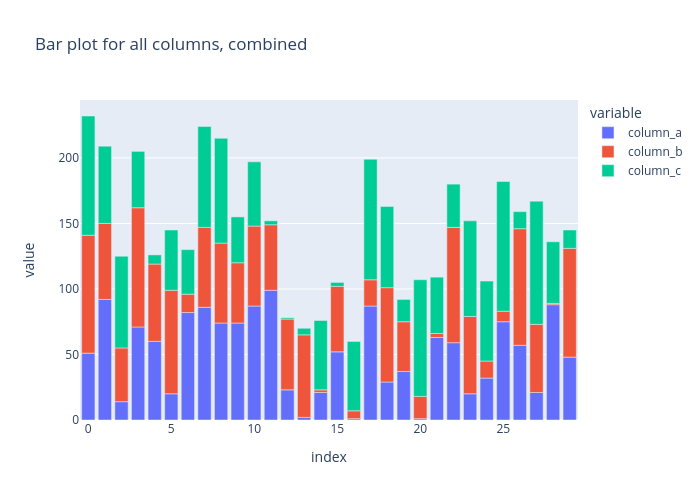

In [ ]:
Image(filename=os.path.join(IMG_FOLDER,'task2_2_plotly.png'))

*Решение*

In [ ]:
plotly_fig = px.bar(df, x=df.index, y=df.columns, title='Bar plot for all columns, combined')
plotly_fig.show()

In [ ]:
# plotly_fig.write_image(os.path.join(IMG_FOLDER, 'task2_2_plotly.png'))

# Exploring Kaggle Dataset with Seaborn

Для практики покрутите [датасет](https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset), основанный на данных из игры FIFA 18

Скачать данные с сайта можно в веб-интерфейсе после регистрации. Также у Kaggle есть [интерфейс](https://github.com/Kaggle/kaggle-api) для работы с командной строкой.

Хорошо написанный тутор с визуализацией данных выше:

- [Часть 1](https://www.kaggle.com/code/residentmario/faceting-with-seaborn)
- [Часть 2](https://www.kaggle.com/code/residentmario/multivariate-plotting/notebook)